In [ ]:
!git --help

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [ ]:
!ls -all

total 20
drwxr-xr-x 1 root root 4096 Nov 11 12:15 .
drwxr-xr-x 1 root root 4096 Nov 11 12:13 ..
drwxr-xr-x 4 root root 4096 Nov  9 14:28 .config
drwx------ 5 root root 4096 Nov 11 12:15 drive
drwxr-xr-x 1 root root 4096 Nov  9 14:29 sample_data


In [1]:
#initialize environment and load modules/libraries

from google.colab import drive
drive.mount('/content/drive')

import io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image
import pandas as pd

Mounted at /content/drive


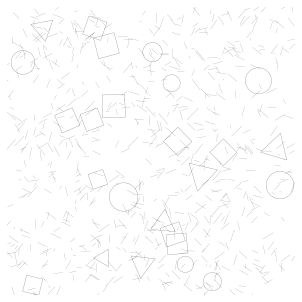

In [15]:


num_shapes=25
num_noise=700

im_size=160
max_radius=8
min_radius=4

noise_line=6

fig, ax = plt.subplots()
plt.gray()
plt.axis('scaled')
plt.axis('off')
plt.subplots_adjust(bottom=0.0, left=0.0, right=1.0, top=1.0)


plt.xlim([0, im_size])
plt.ylim([0, im_size])

lnw = 0.15
lnw_noise = 0.1

rng=np.random.default_rng(100)
shape=rng.integers(2,5,size=num_shapes)
shape[shape==2] = 0
params=rng.random((num_shapes,4))
params_rel = np.zeros((num_shapes,5))

noise_params=rng.random((num_noise,4))

scale=[1.3,1.25]

for i, s in enumerate(shape):
  r = min_radius+params[i,0]*(max_radius-min_radius)
  pos = params[i,1:3]*(im_size-2*r)+r
  if s == 0:
    params_rel[i] = (pos[0],pos[1],r,s,0)
    patch = matplotlib.patches.Circle(pos, radius=r, lw=lnw, fc='k', fill=False)
    ax.add_patch(patch)
  else:
    r = r * scale[s-3]
    a = params[i,3]*2*np.pi/s
    params_rel[i] = (pos[0],pos[1],r,s,a)
    patch = matplotlib.patches.RegularPolygon(pos,numVertices=s,radius=r,orientation=a,lw=lnw,fc='k',fill=False)
    ax.add_patch(patch)

for p in noise_params:
  x=p[0:2]*im_size
  y=x+(p[2:5]-0.5)*2*noise_line
  line = matplotlib.lines.Line2D([x[0],y[0]],[x[1],y[1]],lw=lnw_noise,c='k')
  ax.add_line(line)

plt.show()

fig.set(figwidth=1, figheight=1, dpi=im_size)
#fig.savefig('drive/MyDrive/task.png', transparent=False)
img_buf = io.BytesIO()
fig.savefig(img_buf, format='png', transparent=False)
img = Image.open(img_buf).convert('L')
arr = np.asarray(img)

params_rel[:,0:3] = params_rel[:,0:3]/im_size
params_rel[:,3] = shape

df = pd.DataFrame(params_rel, columns=['pos_x','pos_y','radius','shape','angle'])
df.to_csv('drive/MyDrive/task.csv', float_format='%.6f')

In [ ]:
params_rel.dtype

dtype('float64')

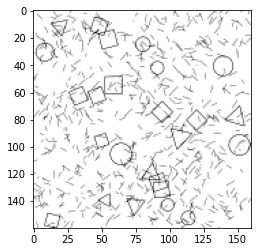

In [ ]:
plt.imshow(arr)

In [14]:

def generateShapes(num_shapes=25,max_radius=1/20,min_radius=1/40,rng=np.random.default_rng(10)):
  params = np.zeros((num_shapes,5))
  params[:,0] = rng.integers(2,5,size=num_shapes)
  params[:,1:5] = rng.random((num_shapes,4))
  for p in params:
    p[3] = min_radius+p[3]*(max_radius-min_radius)
    p[1:3] = p[1:3]*((1-2*p[3])+p[3])
    if p[0] == 2:
      p[4] = 0
    else:
      p[4] = p[4]*2*np.pi/p[0]
  return params

gen_shapes = generateShapes()
gen_shapes

array([[4.        , 0.71689029, 0.78712507, 0.04833596, 0.22775713],
       [4.        , 0.71004346, 0.13270946, 0.04766322, 0.35517972],
       [2.        , 0.81122131, 0.29123301, 0.04924576, 0.        ],
       [2.        , 0.30952829, 0.27109476, 0.04014662, 0.        ],
       [4.        , 0.65744481, 0.14960015, 0.03124439, 1.36642669],
       [4.        , 0.58311603, 0.25445488, 0.02873537, 0.21486789],
       [3.        , 0.23865868, 0.36704196, 0.04122698, 1.75418944],
       [2.        , 0.7537488 , 0.32976665, 0.02871422, 0.        ],
       [4.        , 0.42283172, 0.55450371, 0.03433173, 0.99561007],
       [3.        , 0.10957925, 0.2227923 , 0.04418103, 2.06742824],
       [2.        , 0.77172824, 0.80512317, 0.04489207, 0.        ],
       [2.        , 0.71188028, 0.55747536, 0.03626839, 0.        ],
       [3.        , 0.82533429, 0.06553744, 0.04541836, 1.8469109 ],
       [4.        , 0.40931783, 0.80529495, 0.03352542, 0.81648659],
       [3.        , 0.53090117, 0.

In [31]:
shapes = gen_shapes.copy()
shapes[:,1:4] = shapes[:,1:4]*im_size
shapes

array([[4.00000000e+00, 1.14702447e+02, 1.25940012e+02, 7.73375388e+00,
        2.27757134e-01],
       [4.00000000e+00, 1.13606953e+02, 2.12335133e+01, 7.62611502e+00,
        3.55179722e-01],
       [2.00000000e+00, 1.29795410e+02, 4.65972815e+01, 7.87932147e+00,
        0.00000000e+00],
       [2.00000000e+00, 4.95245270e+01, 4.33751624e+01, 6.42345998e+00,
        0.00000000e+00],
       [4.00000000e+00, 1.05191169e+02, 2.39360246e+01, 4.99910208e+00,
        1.36642669e+00],
       [4.00000000e+00, 9.32985644e+01, 4.07127800e+01, 4.59765960e+00,
        2.14867894e-01],
       [3.00000000e+00, 3.81853888e+01, 5.87267141e+01, 6.59631623e+00,
        1.75418944e+00],
       [2.00000000e+00, 1.20599807e+02, 5.27626641e+01, 4.59427495e+00,
        0.00000000e+00],
       [4.00000000e+00, 6.76530746e+01, 8.87205930e+01, 5.49307689e+00,
        9.95610072e-01],
       [3.00000000e+00, 1.75326806e+01, 3.56467677e+01, 7.06896407e+00,
        2.06742824e+00],
       [2.00000000e+00, 1.2347

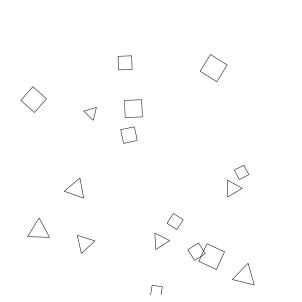

(160, 160)

In [37]:
def generateImage(shapes, im_size=160,lnw = 0.5):
  shapes = shapes.copy()
  shapes[:,1:4] = shapes[:,1:4]*im_size
  
  fig, ax = plt.subplots(figsize=(4,4))
  plt.axis('scaled')
  plt.axis('off')
  plt.xlim(0, im_size)
  plt.ylim(0, im_size)
  plt.subplots_adjust(bottom=0.0, left=0.0, right=1.0, top=1.0)
    
  for s in shapes:
    if s[0] == 2:
      ax.add_patch(matplotlib.patches.Circle(s[1:3], radius=s[4], lw=lnw, fc='b', fill=False))
    else:
      ax.add_patch(matplotlib.patches.RegularPolygon(s[1:3],numVertices=int(s[0]),radius=s[3],orientation=s[4],lw=lnw,fc='b',fill=False))
  
  plt.show()

  img_buf = io.BytesIO()
  fig.set(figwidth=1, figheight=1, dpi=im_size)
  fig.savefig(img_buf, format='png', transparent=False, dpi=im_size)
  img = Image.open(img_buf).convert('L')
  img_buf.close()
  
  return np.asarray(img)

image = generateImage(gen_shapes)
image.shape

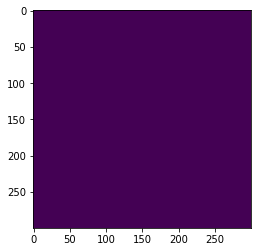

In [ ]:
from PIL import Image, ImageDraw

# size of image
canvas = (300, 300)

# rectangles (width, height, left position, top position)
frames = [(50, 50, 5, 5), (60, 60, 100, 50), (100, 100, 205, 120)]

# init canvas
im = Image.new('L', canvas)
draw = ImageDraw.Draw(im)

# draw rectangles
for frame in frames:
    x1, y1 = frame[2], frame[3]
    x2, y2 = frame[2] + frame[0], frame[3] + frame[1]
    draw.rectangle([x1, y1, x2, y2])

plt.imshow(im)


In [ ]:
gen_shapes

array([[4.        , 0.5587356 , 0.57688692, 0.0383812 , 1.56416302],
       [4.        , 0.48319637, 0.74222176, 0.03735404, 1.56714343],
       [2.        , 0.9462803 , 0.38056136, 0.03304813, 0.        ],
       [3.        , 0.77117831, 0.66708332, 0.03521295, 0.81632218],
       [2.        , 0.12808599, 0.6085715 , 0.02706003, 0.        ],
       [2.        , 0.62602533, 0.01400294, 0.0458633 , 0.        ],
       [3.        , 0.50804018, 0.5297817 , 0.03068117, 2.00219609],
       [2.        , 0.32504609, 0.48114538, 0.04668459, 0.        ],
       [3.        , 0.36591135, 0.09156515, 0.04889514, 1.23478652],
       [4.        , 0.5654421 , 0.57999416, 0.02872185, 0.87972233],
       [4.        , 0.5464844 , 0.56377715, 0.02962372, 1.11466678],
       [3.        , 0.06808309, 0.31587548, 0.02767139, 1.56666763],
       [3.        , 0.48811059, 0.45379131, 0.02684233, 0.9259245 ],
       [4.        , 0.21571977, 0.29241439, 0.0348587 , 1.10997283],
       [4.        , 0.75352993, 0.

array([[3.00000000e+00, 1.09504531e+02, 1.50566158e+02, 5.91804363e+00,
        4.30300515e-01],
       [4.00000000e+00, 8.58022671e+01, 5.89413212e+01, 6.69693905e+00,
        2.13827100e-01],
       [4.00000000e+00, 1.18757789e+02, 3.03620076e+01, 6.87847065e+00,
        8.20111291e-02],
       [4.00000000e+00, 1.29146986e+02, 2.01633674e+01, 6.81480016e+00,
        7.32713044e-01],
       [3.00000000e+00, 4.17895538e+01, 8.84857074e+01, 7.74077675e+00,
        1.06168189e+00],
       [4.00000000e+00, 1.39089453e+02, 1.31720001e+02, 5.39605197e+00,
        1.23793142e+00],
       [2.00000000e+00, 1.11699033e+02, 7.20266099e+01, 7.18676317e+00,
        0.00000000e+00],
       [3.00000000e+00, 1.24041622e+01, 1.31285652e+02, 5.70369145e+00,
        1.86275200e+00],
       [4.00000000e+00, 1.38733865e+02, 6.50558942e+01, 4.77878262e+00,
        4.13058144e-01],
       [3.00000000e+00, 1.21436841e+02, 5.61979071e+01, 7.52626792e+00,
        7.40025018e-01],
       [2.00000000e+00, 2.4706

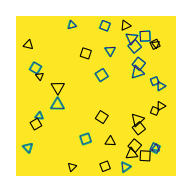

In [ ]:
shapes = generateShapes()
image = generateImage(shapes=shapes)
plt.imshow(image)
shapes

In [ ]:
#functions

def generateShapes_old(num_shapes=25,im_size=160,max_radius=8,min_radius=4,rng=np.random.default_rng(100)):
  shape=rng.integers(2,5,size=num_shapes)
  shape[shape==2] = 0
  params=rng.random((num_shapes,4))
  params_rel = np.zeros((num_shapes,5))
  scale=[1.3,1.25]
  for i, s in enumerate(shape):
    r = min_radius+params[i,0]*(max_radius-min_radius)
    pos = params[i,1:3]*(im_size-2*r)+r
    if s == 0:
      params_rel[i] = (pos[0],pos[1],r,s,0)
    else:
      r = r * scale[s-3]
      a = params[i,3]*2*np.pi/s
      params_rel[i] = (pos[0],pos[1],r,s,a)
  return params_rel

generateShapes_old()

array([[ 94.72224411,  85.19386853,   7.90518239,   4.        ,
          1.56416302],
       [120.10712184,  79.13603413,   7.50973042,   4.        ,
          1.56714343],
       [ 64.65559599,  54.32678268,   7.91448769,   0.        ,
          0.        ],
       [107.87333401,  66.67970512,   9.35648946,   3.        ,
          0.81632218],
       [ 98.9434458 ,  16.96481782,   4.52659358,   0.        ,
          0.        ],
       [  8.77819116, 129.09295211,   6.62446811,   0.        ,
          0.        ],
       [ 86.8804936 ,  39.68518269,   7.92542828,   3.        ,
          2.00219609],
       [ 80.70269045, 134.84019271,   5.3638554 ,   0.        ,
          0.        ],
       [ 19.87599041, 147.87958571,   7.20055652,   3.        ,
          1.23478652],
       [ 94.31364637,  28.26413839,   7.91081446,   4.        ,
          0.87972233],
       [ 91.94532479,  33.5316592 ,   7.8158376 ,   4.        ,
          1.11466678],
       [ 53.47757535,  20.46225733,   5.564

In [ ]:
#use function

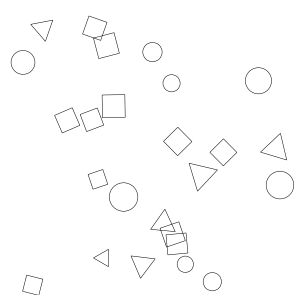

In [ ]:
fig, ax = plt.subplots()
plt.axis('scaled')
plt.axis('off')
plt.subplots_adjust(bottom=0.0, left=0.0, right=1.0, top=1.0)

plt.xlim([0, im_size])
plt.ylim([0, im_size])

lnw = 0.5

shape = params_rel

for s in shape:
  v, a = s[3:5]
  s = s*im_size
  if v == 0:
    patch = matplotlib.patches.Circle(s[0:2], radius=s[2], lw=lnw, fc='b', fill=False)
    ax.add_patch(patch)
  else:
    patch = matplotlib.patches.RegularPolygon(s[0:2],numVertices=v,radius=s[2],orientation=a,lw=lnw,fc='b',fill=False)
    ax.add_patch(patch)

plt.show()

In [ ]:
img = Image.open('drive/MyDrive/to.png').convert('L')
img = np.asarray(img)

tile_size = 32

tiles = [img[x:x+tile_size,y:y+tile_size] for x in range(0,im_size,tile_size) for y in range(0,im_size,tile_size)]

matplotlib.image.imsave('drive/MyDrive/10.png', tiles[10],dpi=tile_size)


In [ ]:
df

,pos_x,pos_y,radius,shape,angle
0,0.592014,0.532462,0.049407,4.0,1.564163
1,0.750670,0.494600,0.046936,4.0,1.567143
2,0.404097,0.339542,0.049466,0.0,0.000000
3,0.674208,0.416748,0.058478,3.0,0.816322
4,0.618397,0.106030,0.028291,0.0,0.000000
5,0.054864,0.806831,0.041403,0.0,0.000000
6,0.543003,0.248032,0.049534,3.0,2.002196
7,0.504392,0.842751,0.033524,0.0,0.000000
8,0.124225,0.924247,0.045003,3.0,1.234787
9,0.589460,0.176651,0.049443,4.0,0.879722
